<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<center>
<H1 align='center'> INF-395 Redes Neuronales Artificiales 2019-1</H1>

<H3 align='center'> Tarea 2 - Redes Neuronales y *Deep Learning* </H3>
</center>
<hr style="height:2px;border:none"/>

## Integrantes

* _**Francisco Olivares - 201473575-8 - fracisco.olivars.14@sansano.usm.cl**_
* _**Felipe Vega - 201473511-1 - felipe.vega.14@sansano.usm.cl**_



<hr style="height:2px;border:none"/>

In [49]:
import numpy as np
import os 
import matplotlib.pyplot as plt
from PIL import Image

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score
from sklearn.decomposition import PCA

from keras.models import Sequential, Model
from keras.layers import merge, Conv2D, MaxPool2D, Conv2DTranspose, UpSampling2D, BatchNormalization, Input
from keras.applications.resnet50 import ResNet50

from skimage import filters

from IPython.display import IFrame
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
def charge_images(img_size, folder):
    X_image= []
    data = [archivo.split(".")[0] for archivo in os.listdir(folder+"/image")]
    for archivo in data:
        I = Image.open("{}/image/{}.jpg".format(folder,archivo))
        I = np.asarray(I.resize((img_size,img_size),Image.ANTIALIAS))
        X_image.append(I)
    X_image = np.asarray(X_image)
    Y_image = []
    for archivo in data:
        I = Image.open("{}/ground-truth/{}.png".format(folder,archivo))
        I = np.asarray(I.resize((img_size,img_size),Image.ANTIALIAS))
        Y_image.append(I)
    Y_image = np.asarray(Y_image)
    return X_image, Y_image
        

In [48]:
img_size = 100
img_shape = (100,100,3)
folder = "Semantic dataset100"

In [4]:
X_image, Y_image = charge_images(img_size,folder)

> _**a) Explore los datos a trabajar, visualice la entrada y salida del modelo, además de las dimensionalidades de éstas ¿Es un problema las dimensiones de los datos versus la cantidad de datos a entrenar? Normalice los datos como se acostumbra en imágenes y genere una dimensión/canal extra a la salida.**_

In [5]:
X_image.shape

(100, 100, 100, 3)

In [6]:
Y_image.shape

(100, 100, 100)

In [7]:
def show_9_images(X_image,Y_image):
    plt.figure(figsize=(10,40))
    for i in range(1,20,2):
        random = np.random.randint(0,X_image.shape[0])
        plt.subplot(10,2,i)
        plt.imshow(X_image[random])
        plt.subplot(10,2,i+1)
        plt.imshow(Y_image[random])
    plt.show()

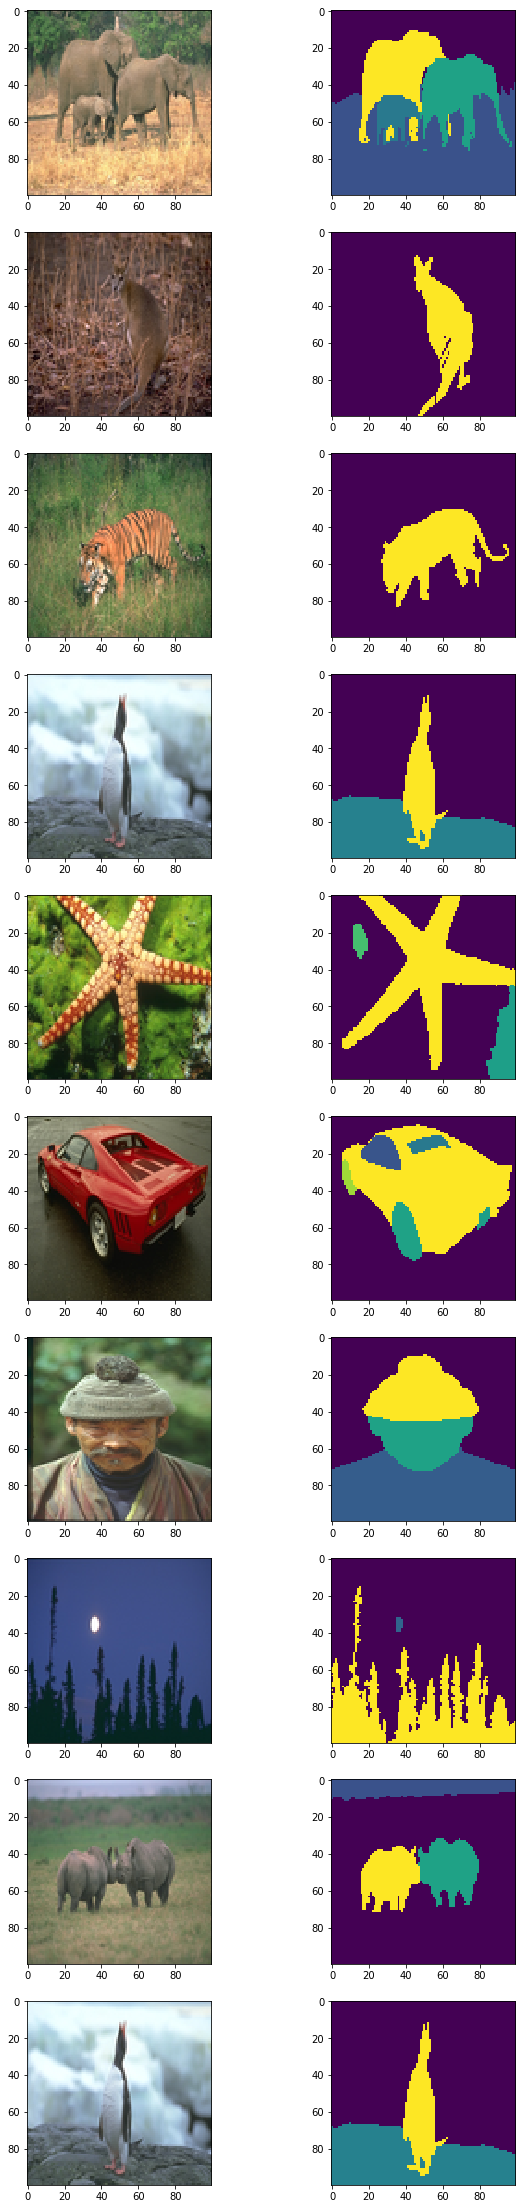

In [8]:
show_9_images(X_image,Y_image)

In [9]:
X_image = X_image/255.
Y_image = Y_image/255.
Y_image = Y_image[:,:,:,None]

> _**b) Separe 10 imágenes como conjunto de pruebas para verificar la calidad del modelo entrenado.**_

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X_image,Y_image,test_size=0.1,random_state=42) 

In [11]:
x_test.shape

(10, 100, 100, 3)

> _**c) Debido a la poca cantidad de datos presentes defina la arquitectura utilizando únicamente convolucionales (fully convolutional). Comente sobre los cambios en la dimensionalidad a través del forward pass. Decida el tamaño del batch en base a la cantidad de datos que se presenta para entrenar.**_

In [12]:
def get_convolutional():
    model = Sequential()
    #Lets do the Encoder
    model.add(Conv2D(32,(3,3),activation='relu',padding='same',input_shape=X_image.shape[1:]))
    model.add(Conv2D(32,(3,3),activation='relu',padding='same'))
    model.add(MaxPool2D((2,2)))
    model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
    model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
    model.add(MaxPool2D((2,2)))
    model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
    model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
    #Decoder Time
    model.add(UpSampling2D((2,2)))
    model.add(Conv2DTranspose(32,(3,3),activation='relu',padding='same'))
    model.add(Conv2DTranspose(32,(3,3),activation='relu',padding='same'))
    model.add(Conv2DTranspose(1,(3,3),strides=(2,2),activation='sigmoid',padding='same'))
    model.summary()
    model.compile(loss='binary_crossentropy',optimizer='rmsprop')
    return model

In [13]:
conv_model = get_convolutional()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 100, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 100, 100, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 50, 50, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 25, 25, 128)       73856     
__________

In [14]:
train_hist = conv_model.fit(x_train,y_train,epochs=100,batch_size=30,validation_data=(x_test,y_test))

Train on 90 samples, validate on 10 samples
Epoch 1/100
90/90 [==============================] - 25s 279ms/step - loss: 1.3943 - val_loss: 0.6608
Epoch 2/100
90/90 [==============================] - 2s 21ms/step - loss: 0.6522 - val_loss: 0.6412
Epoch 3/100
90/90 [==============================] - 2s 21ms/step - loss: 0.6354 - val_loss: 0.6364
Epoch 4/100
90/90 [==============================] - 2s 21ms/step - loss: 0.6407 - val_loss: 0.6315
Epoch 5/100
90/90 [==============================] - 2s 20ms/step - loss: 0.6475 - val_loss: 0.6437
Epoch 6/100
90/90 [==============================] - 2s 21ms/step - loss: 0.6530 - val_loss: 0.6570
Epoch 7/100
90/90 [==============================] - 2s 21ms/step - loss: 0.6421 - val_loss: 0.6256
Epoch 8/100
90/90 [==============================] - 2s 21ms/step - loss: 0.6254 - val_loss: 0.6230
Epoch 9/100
90/90 [==============================] - 2s 21ms/step - loss: 0.6165 - val_loss: 0.6099
Epoch 10/100
90/90 [==============================] - 

90/90 [==============================] - 2s 20ms/step - loss: 0.5063 - val_loss: 0.5557
Epoch 82/100
90/90 [==============================] - 2s 20ms/step - loss: 0.4962 - val_loss: 0.5846
Epoch 83/100
90/90 [==============================] - 2s 20ms/step - loss: 0.5184 - val_loss: 0.5790
Epoch 84/100
90/90 [==============================] - 2s 20ms/step - loss: 0.5019 - val_loss: 0.6184
Epoch 85/100
90/90 [==============================] - 2s 20ms/step - loss: 0.5026 - val_loss: 0.6475
Epoch 86/100
90/90 [==============================] - 2s 20ms/step - loss: 0.5178 - val_loss: 0.5664
Epoch 87/100
90/90 [==============================] - 2s 21ms/step - loss: 0.4856 - val_loss: 0.5767
Epoch 88/100
90/90 [==============================] - 2s 21ms/step - loss: 0.5158 - val_loss: 0.5862
Epoch 89/100
90/90 [==============================] - 2s 20ms/step - loss: 0.5008 - val_loss: 0.5662
Epoch 90/100
90/90 [==============================] - 2s 20ms/step - loss: 0.4869 - val_loss: 0.6709
Epo

In [15]:
def loss_versus_epoch(hist):
    plt.figure(figsize=(15,5))
    plt.title("Loss versus Epoch")
    eps = [i + 1 for i in range(100)]
    plt.plot(eps, hist.history['loss'],'-o')
    plt.plot(eps,hist.history['val_loss'],'-o')
    plt.xlabel("Epochs")
    plt.ylabel("Binary Crossentropy Loss")
    plt.legend(['Train','Test'],loc='upper right')
    plt.show()

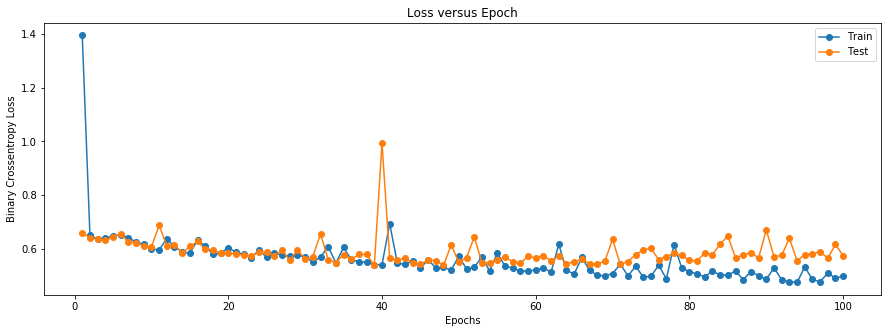

In [16]:
loss_versus_epoch(train_hist)

> _**d) Para medir el desempeño del modelo sobre ambos conjuntos realice un análisis cualitativo en base a visualizar la segmentación que realiza versus la segmentación real, además de verificar la precisión y recall asumiendo valores binarios de pixel ¿Que valor debería ser más importante, los ceros o unos? Comente.**_

In [17]:
def recall_and_precision(pred,dataset='test'):
    if dataset=='test':
        data = np.squeeze(y_test)
    else:
        data = np.squeeze(y_train)
    y_label = data.flatten() > 0.5
    y_hat_label = pred.flatten() > 0.5
    print("Precision in {} dataset: {}".format(dataset,precision_score(y_label,y_hat_label,average=None,labels=[0,1])))
    print("Recall in {} dataset: {}".format(dataset,recall_score(y_label,y_hat_label,average=None,labels=[0,1])))

In [18]:
def compare_images(model,dataset='test'):
    np.random.seed(42)
    if dataset == 'test':
        y_hat = np.squeeze(model.predict(x_test))
        data = y_test
        x_data = x_test
    else:
        y_hat = np.squeeze(model.predict(x_train))
        data = y_train
        x_data = x_train
    recall_and_precision(y_hat,dataset)
    plt.figure(figsize=(20,40))
    for i in range(1,30,3):
        random = np.random.randint(0,data.shape[0])
        plt.subplot(10,3,i)
        plt.title("Real Image")
        plt.imshow(np.squeeze(x_data[random]))
        plt.subplot(10,3,i+1)
        plt.title("Convolutional Network Segmentation")
        plt.imshow(y_hat[random])
        plt.subplot(10,3,i+2)
        plt.title("Real Segmentation")
        plt.imshow(np.squeeze(data[random]))
        
    plt.show()

#### Train dataset

Precision in train dataset: [0.8009757  0.70563077]
Recall in train dataset: [0.8934566  0.53497168]


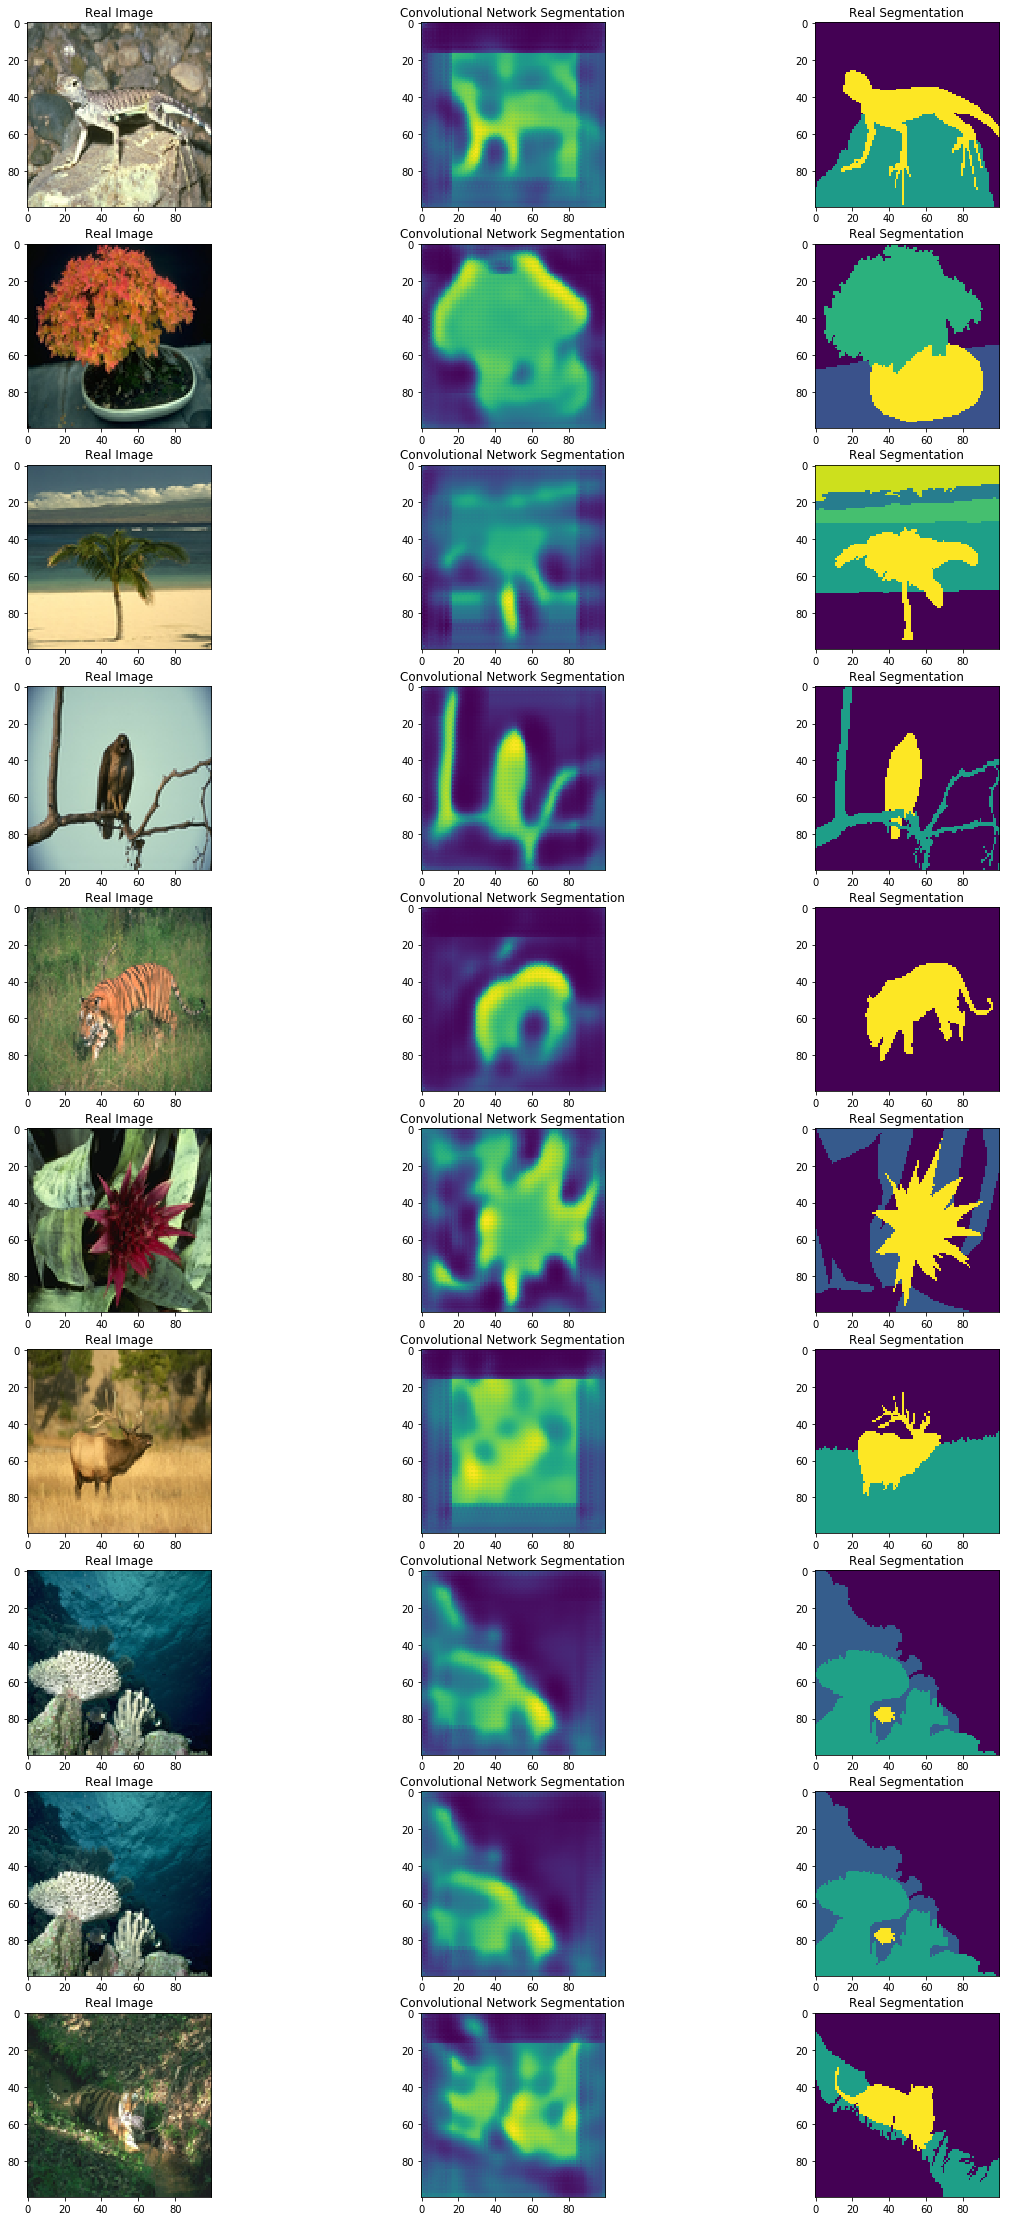

In [19]:
compare_images(conv_model,dataset='train')

#### Test Dataset

Precision in test dataset: [0.75850376 0.53056413]
Recall in test dataset: [0.84153559 0.40064092]


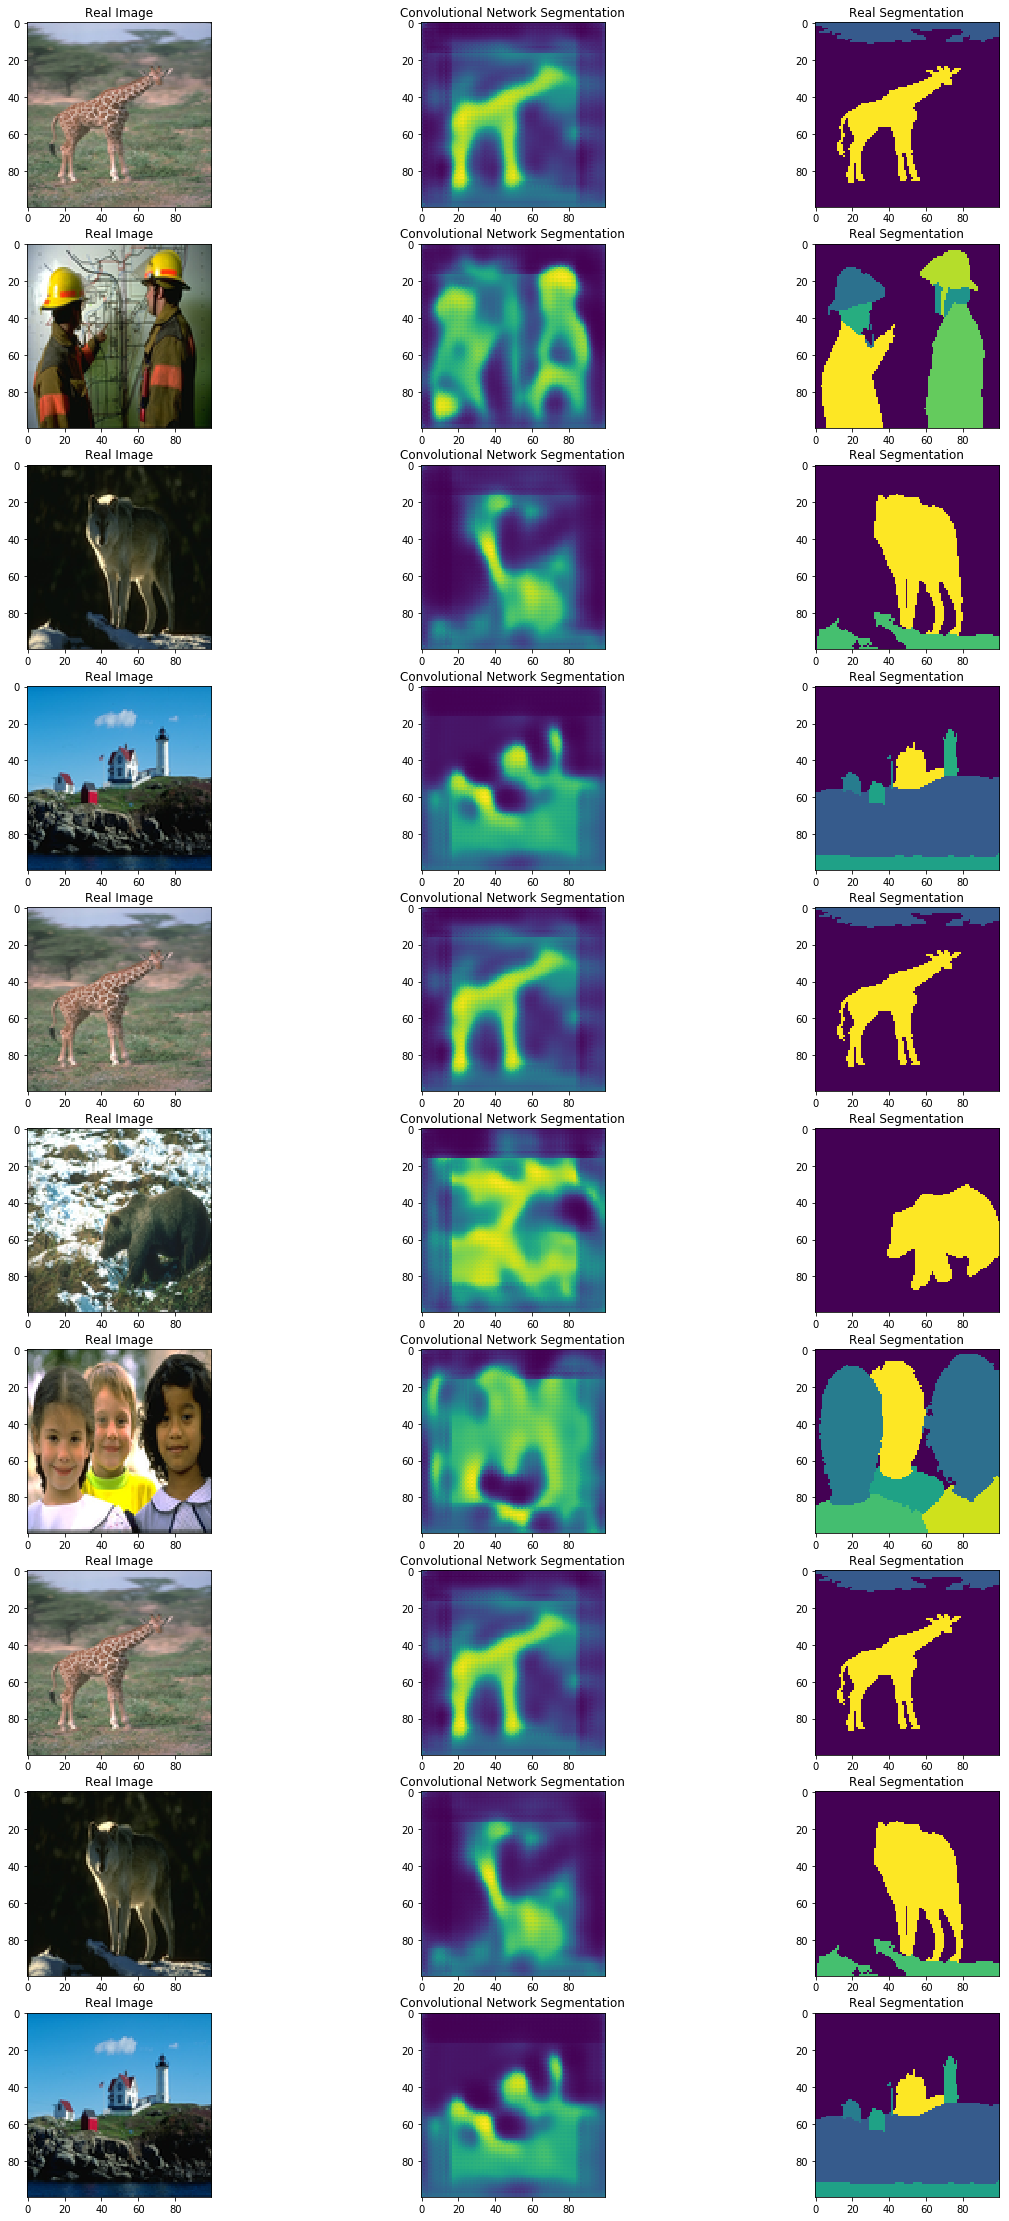

In [20]:
compare_images(conv_model)

> _**e) Compárese con alguna técnica manual de Image Segmentation, comúnmente se sugiere considerar un treshold para activar o apagar un pixel. Experimente con utilizar treshold igual a la media o con otra técnica más inteligente basada en los histogramas de escala de grises, como se utilizan en skimage.**_

In [21]:
#Gray-Scale
gray_x = 0.2125 * X_image[:,:,:,0] + 0.7154*X_image[:,:,:,1] + 0.0721*X_image[:,:,:,2]

In [22]:
treshold_mean = gray_x.mean()
mask_mean = gray_x < treshold_mean
x_mean_segmented = mask_mean*1

In [23]:
treshold_ski = filters.threshold_otsu(gray_x)
mask_ski = gray_x < treshold_ski
x_ski_segmented = mask_ski * 1

In [24]:
def compare_treshold(mean, ski):
    plt.figure(figsize=(30,40))
    for i in range(1,40,4):
        random = np.random.randint(0,X_image.shape[0])
        plt.subplot(10,4,i)
        plt.title("Real Image")
        plt.imshow(np.squeeze(X_image[random]))
        plt.subplot(10,4,i+1)
        plt.title("Mean Treshold Segmentation")
        plt.imshow(mean[random])
        plt.subplot(10,4,i+2)
        plt.title("Skimage Treshold Segmentation")
        plt.imshow(np.squeeze(ski[random]))
        plt.subplot(10,4,i+3)
        plt.title("Real Segmentation")
        plt.imshow(np.squeeze(Y_image[random]))
    plt.show()

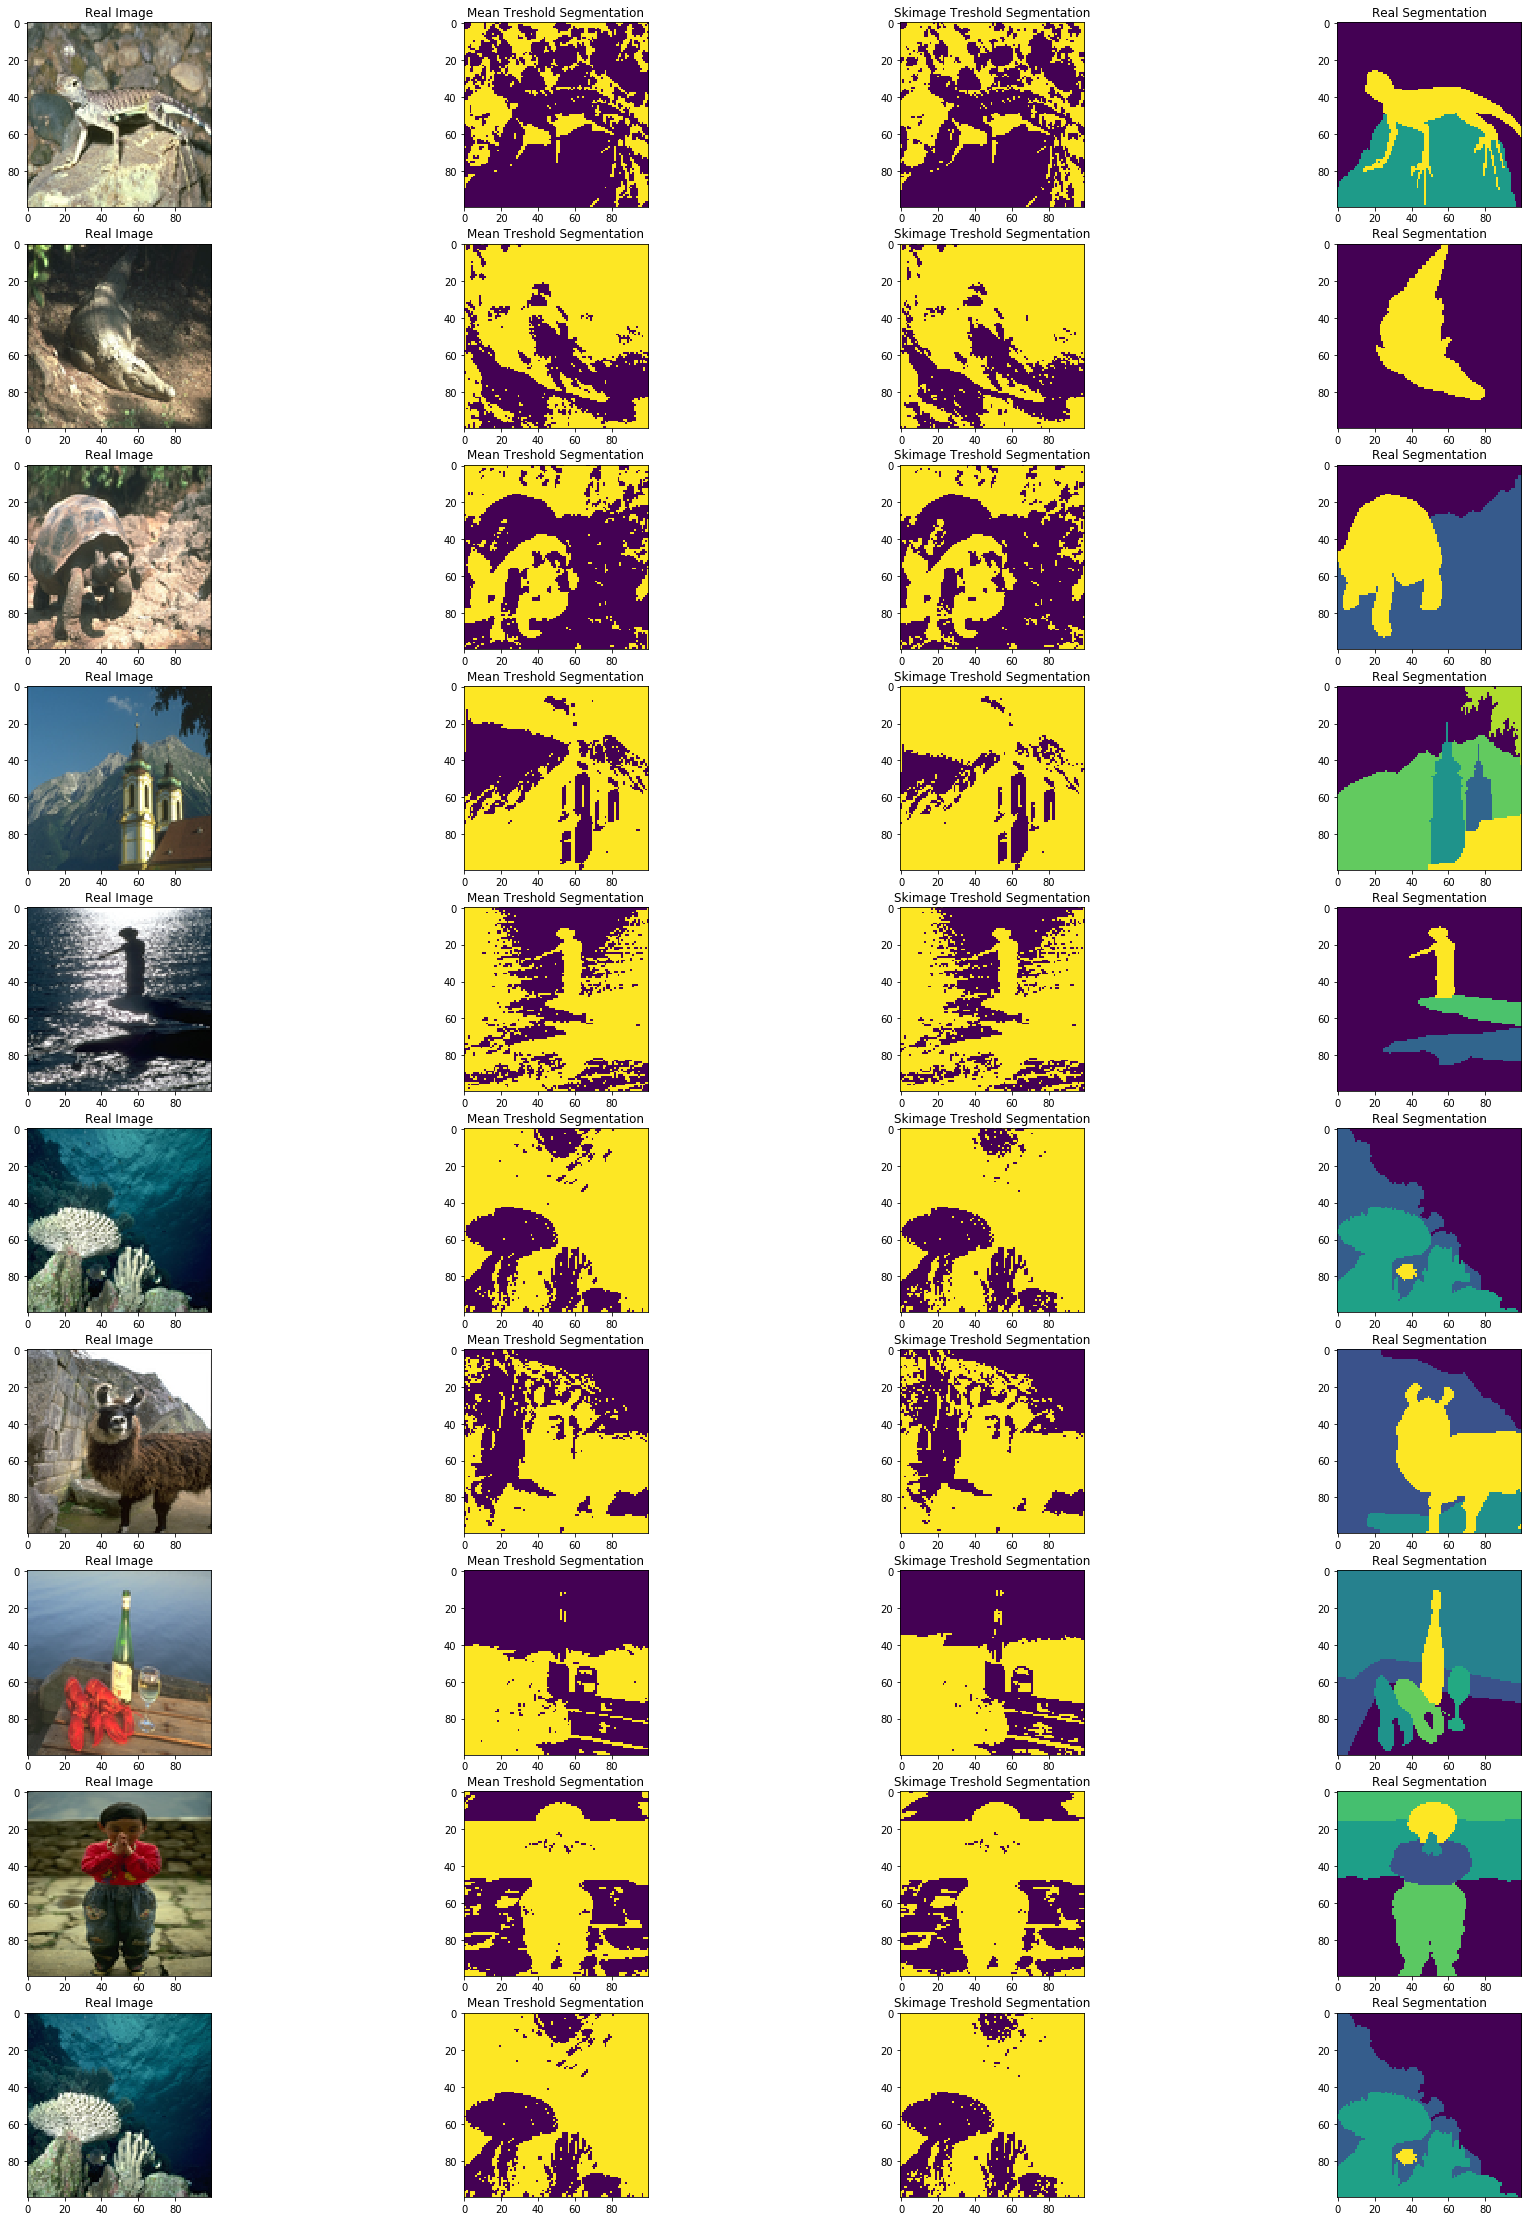

In [25]:
compare_treshold(x_mean_segmented,x_ski_segmented)

> _**f) Experimente con realizar data augmentation sobre el problema. Debido a que las operaciones clásifcas de augmentation como rotar, invertir, girar, cambiarían la etiqueta de segmentación, genere una estrategia que mantenga la etiqueta/salida Y. Se presenta un código de ejemplo, Denoising, de aplicar una máscara binaria aleatoria sobre la imagen de entrada X, de todas formas se espera que proponga alguna distinta. Compare el desempeño alcanzado con la nueva red con la forma de evaluar definida en (d).**_

In [26]:
def train_with_augmentation(model,aug):
#     pca = PCA(n_components = 3)
    for i in range(aug):
        x_aug = np.copy(x_train)
        for channel in range(3):
            channel_variation = np.ones(x_aug[:,:,:,channel].shape)*np.random.normal(loc=0,scale=1)
            x_aug[:,:,:,channel] += channel_variation/np.max(channel_variation)
            #x_aug[:,:,:,channel] = x_aug[:,:,:,channel] / np.max(x_aug[:,:,:,channel])
        model.fit(x_aug,y_train,epochs=1,batch_size=32,validation_data=(x_test,y_test))
    return model    
        
    

In [27]:
conv_model = train_with_augmentation(conv_model,100)

Train on 90 samples, validate on 10 samples
Epoch 1/1
90/90 [==============================] - 4s 49ms/step - loss: 0.5957 - val_loss: 0.6216
Train on 90 samples, validate on 10 samples
Epoch 1/1
90/90 [==============================] - 2s 21ms/step - loss: 0.6076 - val_loss: 0.6306
Train on 90 samples, validate on 10 samples
Epoch 1/1
90/90 [==============================] - 2s 21ms/step - loss: 0.5621 - val_loss: 0.6032
Train on 90 samples, validate on 10 samples
Epoch 1/1
90/90 [==============================] - 2s 20ms/step - loss: 0.5524 - val_loss: 0.6639
Train on 90 samples, validate on 10 samples
Epoch 1/1
90/90 [==============================] - 2s 21ms/step - loss: 0.5495 - val_loss: 0.6019
Train on 90 samples, validate on 10 samples
Epoch 1/1
90/90 [==============================] - 2s 21ms/step - loss: 0.5434 - val_loss: 0.5907
Train on 90 samples, validate on 10 samples
Epoch 1/1
90/90 [==============================] - 2s 20ms/step - loss: 0.5711 - val_loss: 0.5702
Train 

90/90 [==============================] - 2s 20ms/step - loss: 0.5167 - val_loss: 0.6033
Train on 90 samples, validate on 10 samples
Epoch 1/1
90/90 [==============================] - 2s 21ms/step - loss: 0.5087 - val_loss: 0.6103
Train on 90 samples, validate on 10 samples
Epoch 1/1
90/90 [==============================] - 2s 21ms/step - loss: 0.5061 - val_loss: 0.5881
Train on 90 samples, validate on 10 samples
Epoch 1/1
90/90 [==============================] - 2s 21ms/step - loss: 0.5163 - val_loss: 0.6258
Train on 90 samples, validate on 10 samples
Epoch 1/1
90/90 [==============================] - 2s 20ms/step - loss: 0.4916 - val_loss: 0.5868
Train on 90 samples, validate on 10 samples
Epoch 1/1
90/90 [==============================] - 2s 20ms/step - loss: 0.5237 - val_loss: 0.6296
Train on 90 samples, validate on 10 samples
Epoch 1/1
90/90 [==============================] - 2s 20ms/step - loss: 0.5044 - val_loss: 0.6007
Train on 90 samples, validate on 10 samples
Epoch 1/1
90/90 

Precision in train dataset: [0.81788621 0.58811167]
Recall in train dataset: [0.78863355 0.63217237]


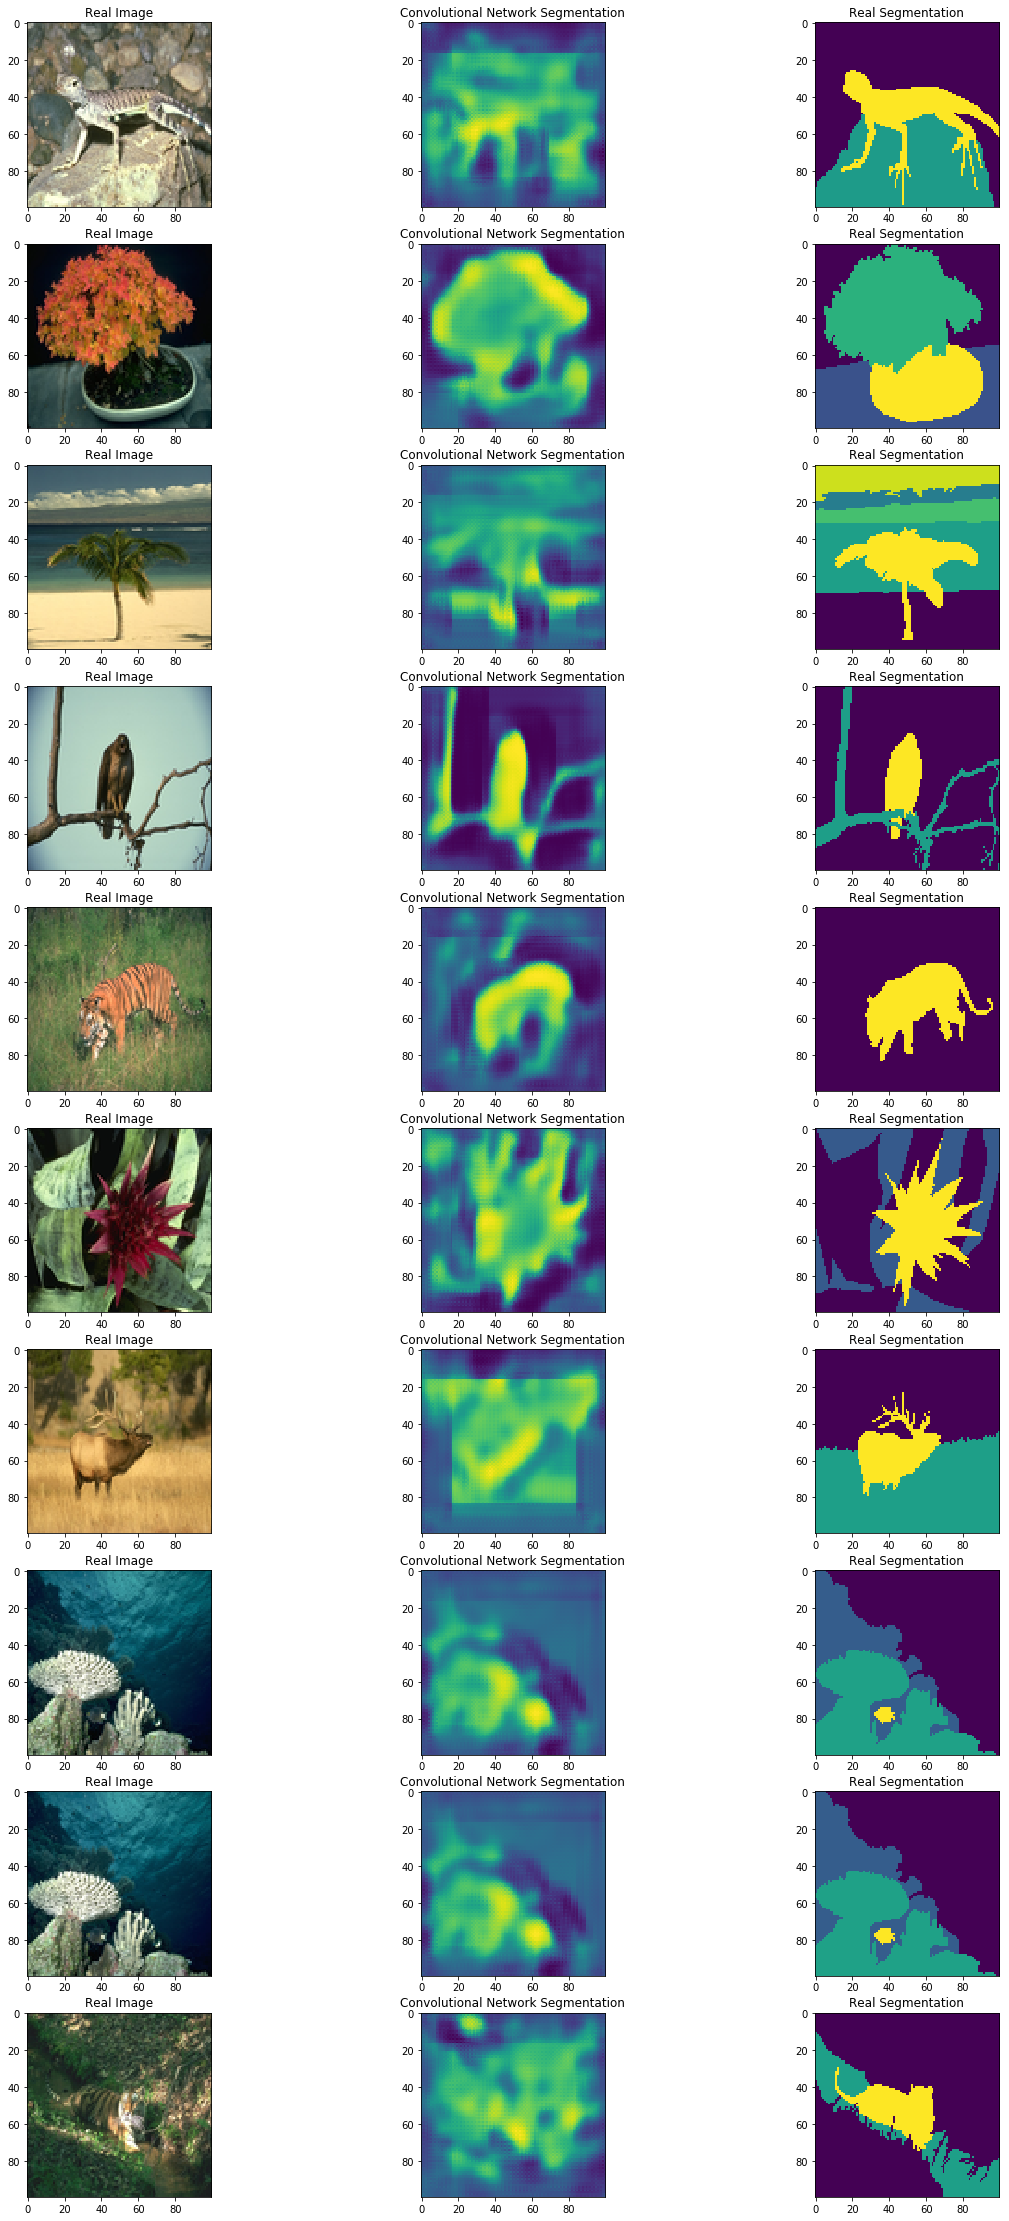

In [28]:
compare_images(conv_model,dataset='train')

Precision in test dataset: [0.75313795 0.43009388]
Recall in test dataset: [0.72065059 0.47159551]


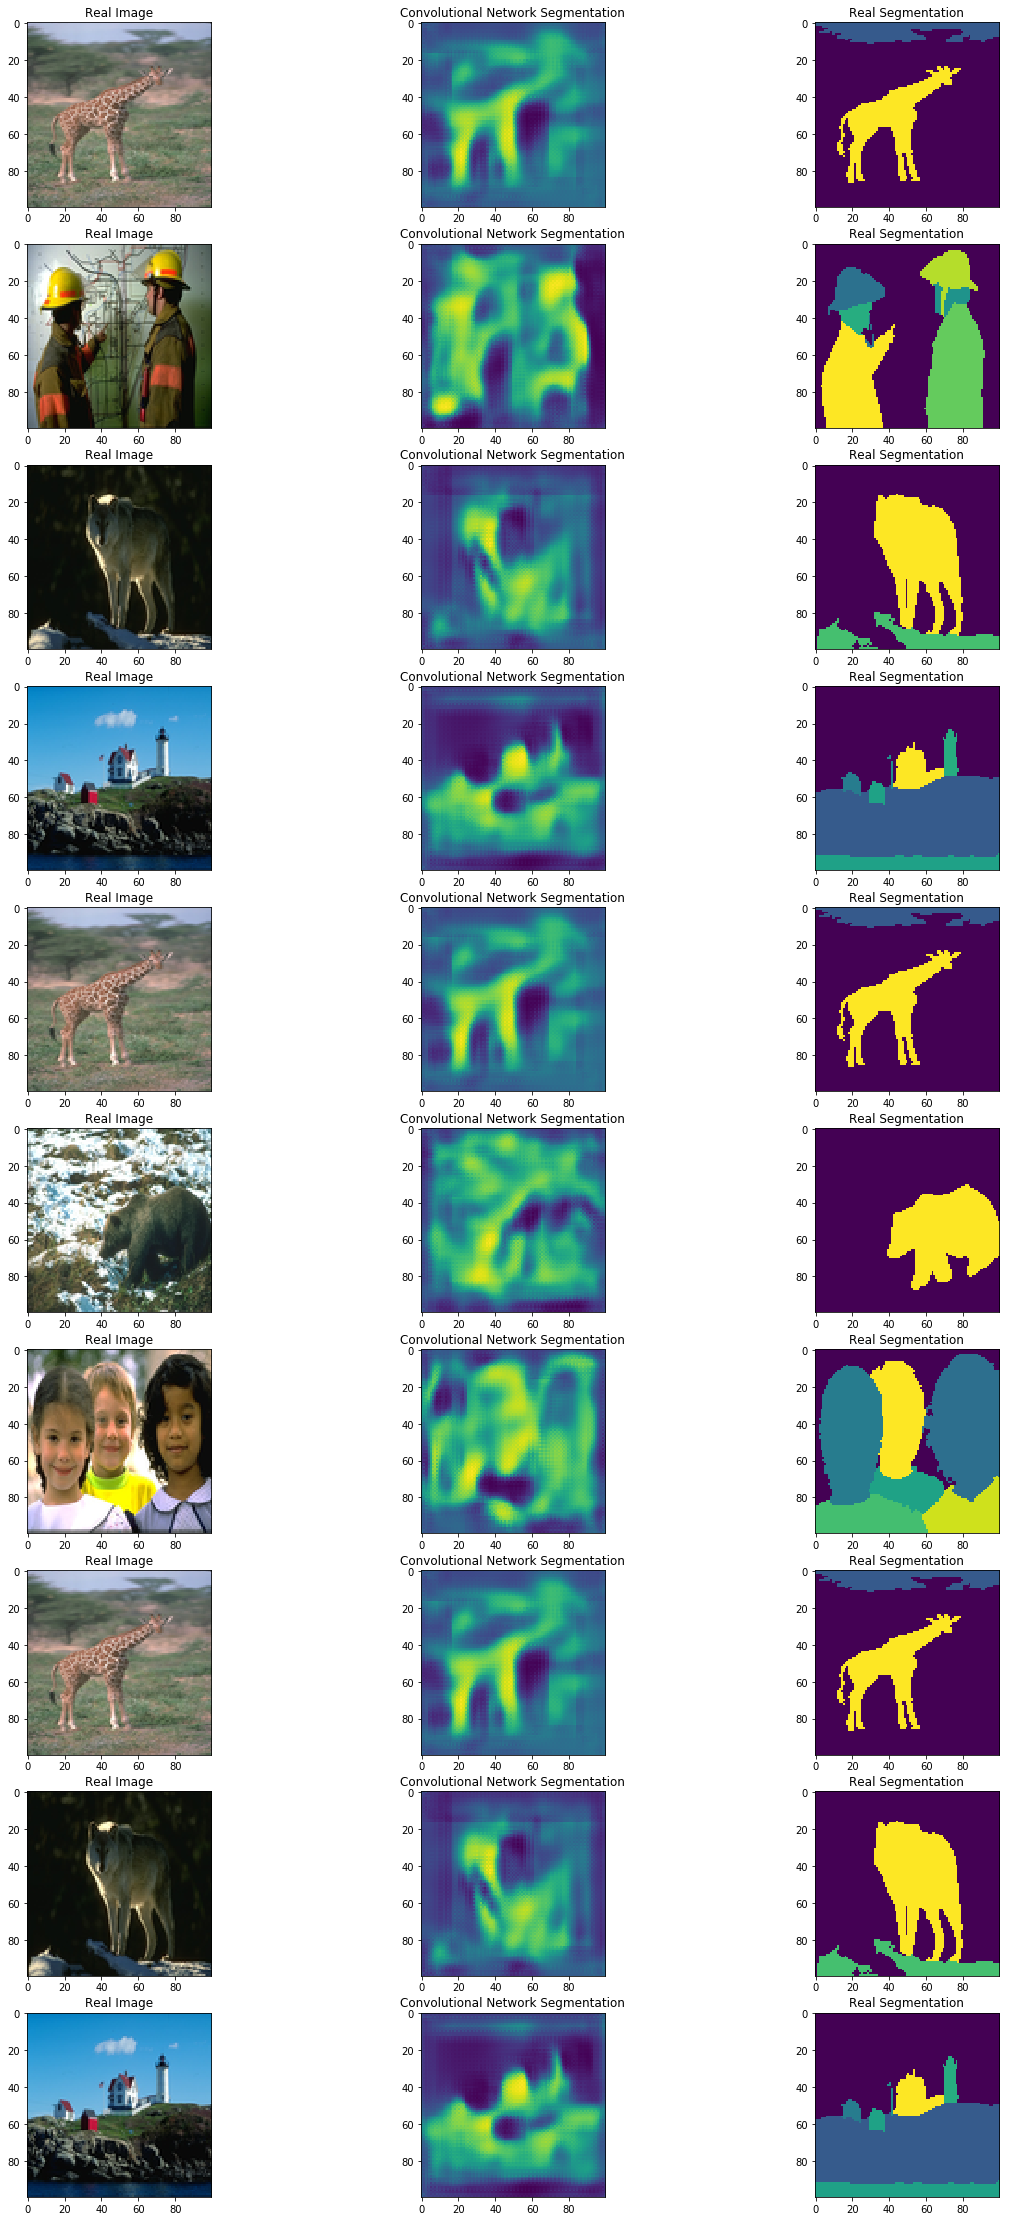

In [29]:
compare_images(conv_model)

In [30]:
def train_with_denoising(model,aug):
    for _ in range(aug):
        noise_level = np.random.randint(4,10)/10
        noise_mask = np.random.binomial(n=1,p=noise_level,size=X_image.shape)
        x_augmented = X_image*noise_mask
        model.fit(x_augmented,Y_image,epochs=1,batch_size=32,validation_data=(X_image,Y_image))
    return model

In [31]:
conv_model_denoising = get_convolutional()
conv_model_denoising.fit(x_train,y_train,epochs=100,batch_size=30,validation_data=(x_test,y_test))
conv_model_denoising = train_with_denoising(conv_model_denoising,100)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 100, 100, 32)      896       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 100, 100, 32)      9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 50, 50, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 25, 25, 128)       73856     
__________

Epoch 63/100
90/90 [==============================] - 2s 20ms/step - loss: 0.5391 - val_loss: 0.5416
Epoch 64/100
90/90 [==============================] - 2s 20ms/step - loss: 0.5045 - val_loss: 0.5439
Epoch 65/100
90/90 [==============================] - 2s 21ms/step - loss: 0.5236 - val_loss: 0.6268
Epoch 66/100
90/90 [==============================] - 2s 21ms/step - loss: 0.5320 - val_loss: 0.5443
Epoch 67/100
90/90 [==============================] - 2s 20ms/step - loss: 0.5026 - val_loss: 0.5372
Epoch 68/100
90/90 [==============================] - 2s 20ms/step - loss: 0.5421 - val_loss: 0.5426
Epoch 69/100
90/90 [==============================] - 2s 20ms/step - loss: 0.5132 - val_loss: 0.5482
Epoch 70/100
90/90 [==============================] - 2s 20ms/step - loss: 0.4974 - val_loss: 0.5428
Epoch 71/100
90/90 [==============================] - 2s 21ms/step - loss: 0.5349 - val_loss: 0.5409
Epoch 72/100
90/90 [==============================] - 2s 20ms/step - loss: 0.5074 - val_los

100/100 [==============================] - 3s 26ms/step - loss: 0.4983 - val_loss: 0.4918
Train on 100 samples, validate on 100 samples
Epoch 1/1
100/100 [==============================] - 3s 26ms/step - loss: 0.5281 - val_loss: 0.4932
Train on 100 samples, validate on 100 samples
Epoch 1/1
100/100 [==============================] - 3s 26ms/step - loss: 0.5144 - val_loss: 0.5769
Train on 100 samples, validate on 100 samples
Epoch 1/1
100/100 [==============================] - 3s 26ms/step - loss: 0.5451 - val_loss: 0.4998
Train on 100 samples, validate on 100 samples
Epoch 1/1
100/100 [==============================] - 3s 26ms/step - loss: 0.5028 - val_loss: 0.5709
Train on 100 samples, validate on 100 samples
Epoch 1/1
100/100 [==============================] - 3s 26ms/step - loss: 0.5198 - val_loss: 0.4918
Train on 100 samples, validate on 100 samples
Epoch 1/1
100/100 [==============================] - 3s 26ms/step - loss: 0.5004 - val_loss: 0.5284
Train on 100 samples, validate on 

100/100 [==============================] - 3s 26ms/step - loss: 0.4734 - val_loss: 0.5306
Train on 100 samples, validate on 100 samples
Epoch 1/1
100/100 [==============================] - 3s 26ms/step - loss: 0.5274 - val_loss: 0.5293
Train on 100 samples, validate on 100 samples
Epoch 1/1
100/100 [==============================] - 3s 26ms/step - loss: 0.4787 - val_loss: 0.4616
Train on 100 samples, validate on 100 samples
Epoch 1/1
100/100 [==============================] - 3s 26ms/step - loss: 0.4659 - val_loss: 0.4827
Train on 100 samples, validate on 100 samples
Epoch 1/1
100/100 [==============================] - 3s 26ms/step - loss: 0.4790 - val_loss: 0.5617
Train on 100 samples, validate on 100 samples
Epoch 1/1
100/100 [==============================] - 3s 26ms/step - loss: 0.5108 - val_loss: 0.5695
Train on 100 samples, validate on 100 samples
Epoch 1/1
100/100 [==============================] - 3s 26ms/step - loss: 0.5001 - val_loss: 0.4553
Train on 100 samples, validate on 

Precision in train dataset: [0.78974288 0.75764727]
Recall in train dataset: [0.9261662  0.48349672]


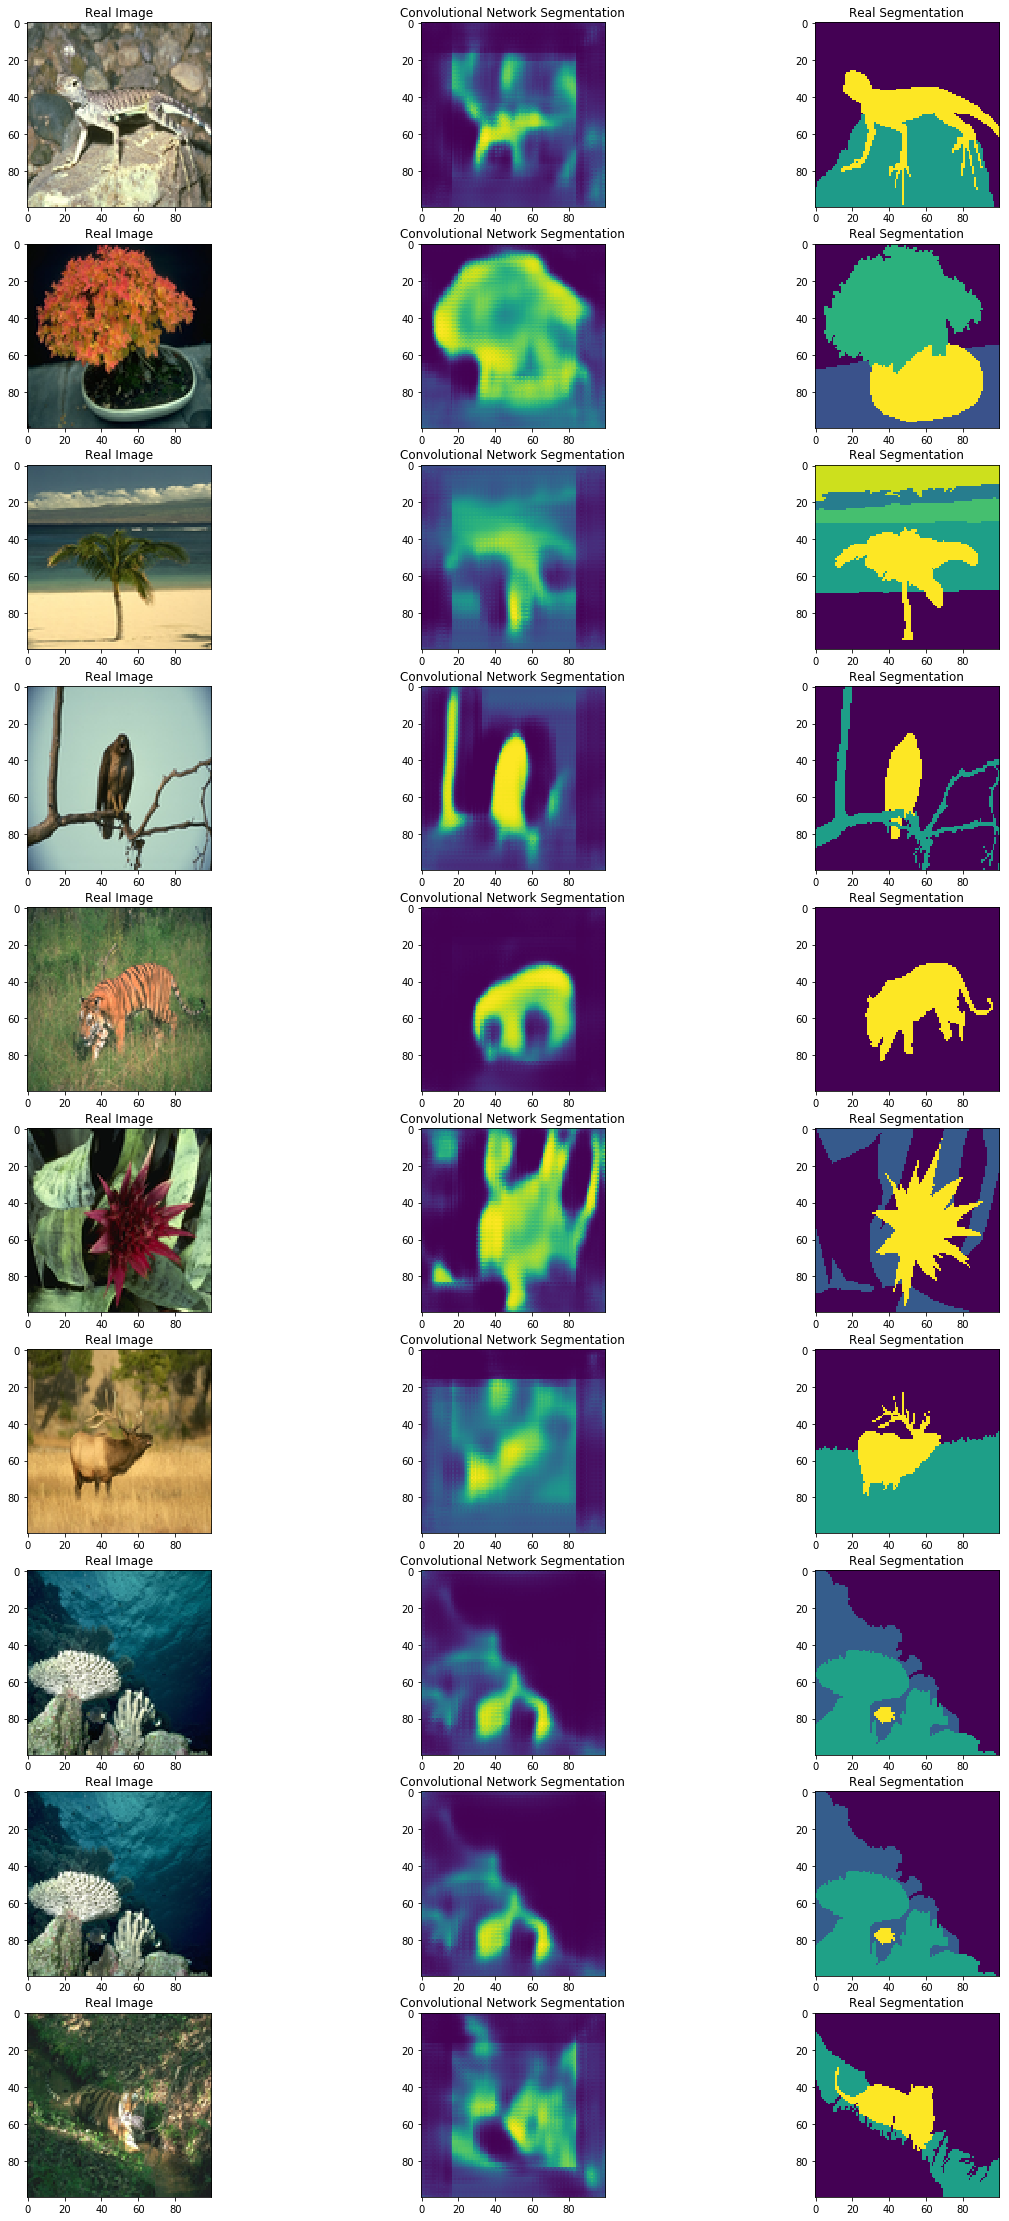

In [32]:
compare_images(conv_model_denoising,dataset='train')

Precision in test dataset: [0.80040347 0.65219191]
Recall in test dataset: [0.87842042 0.50998608]


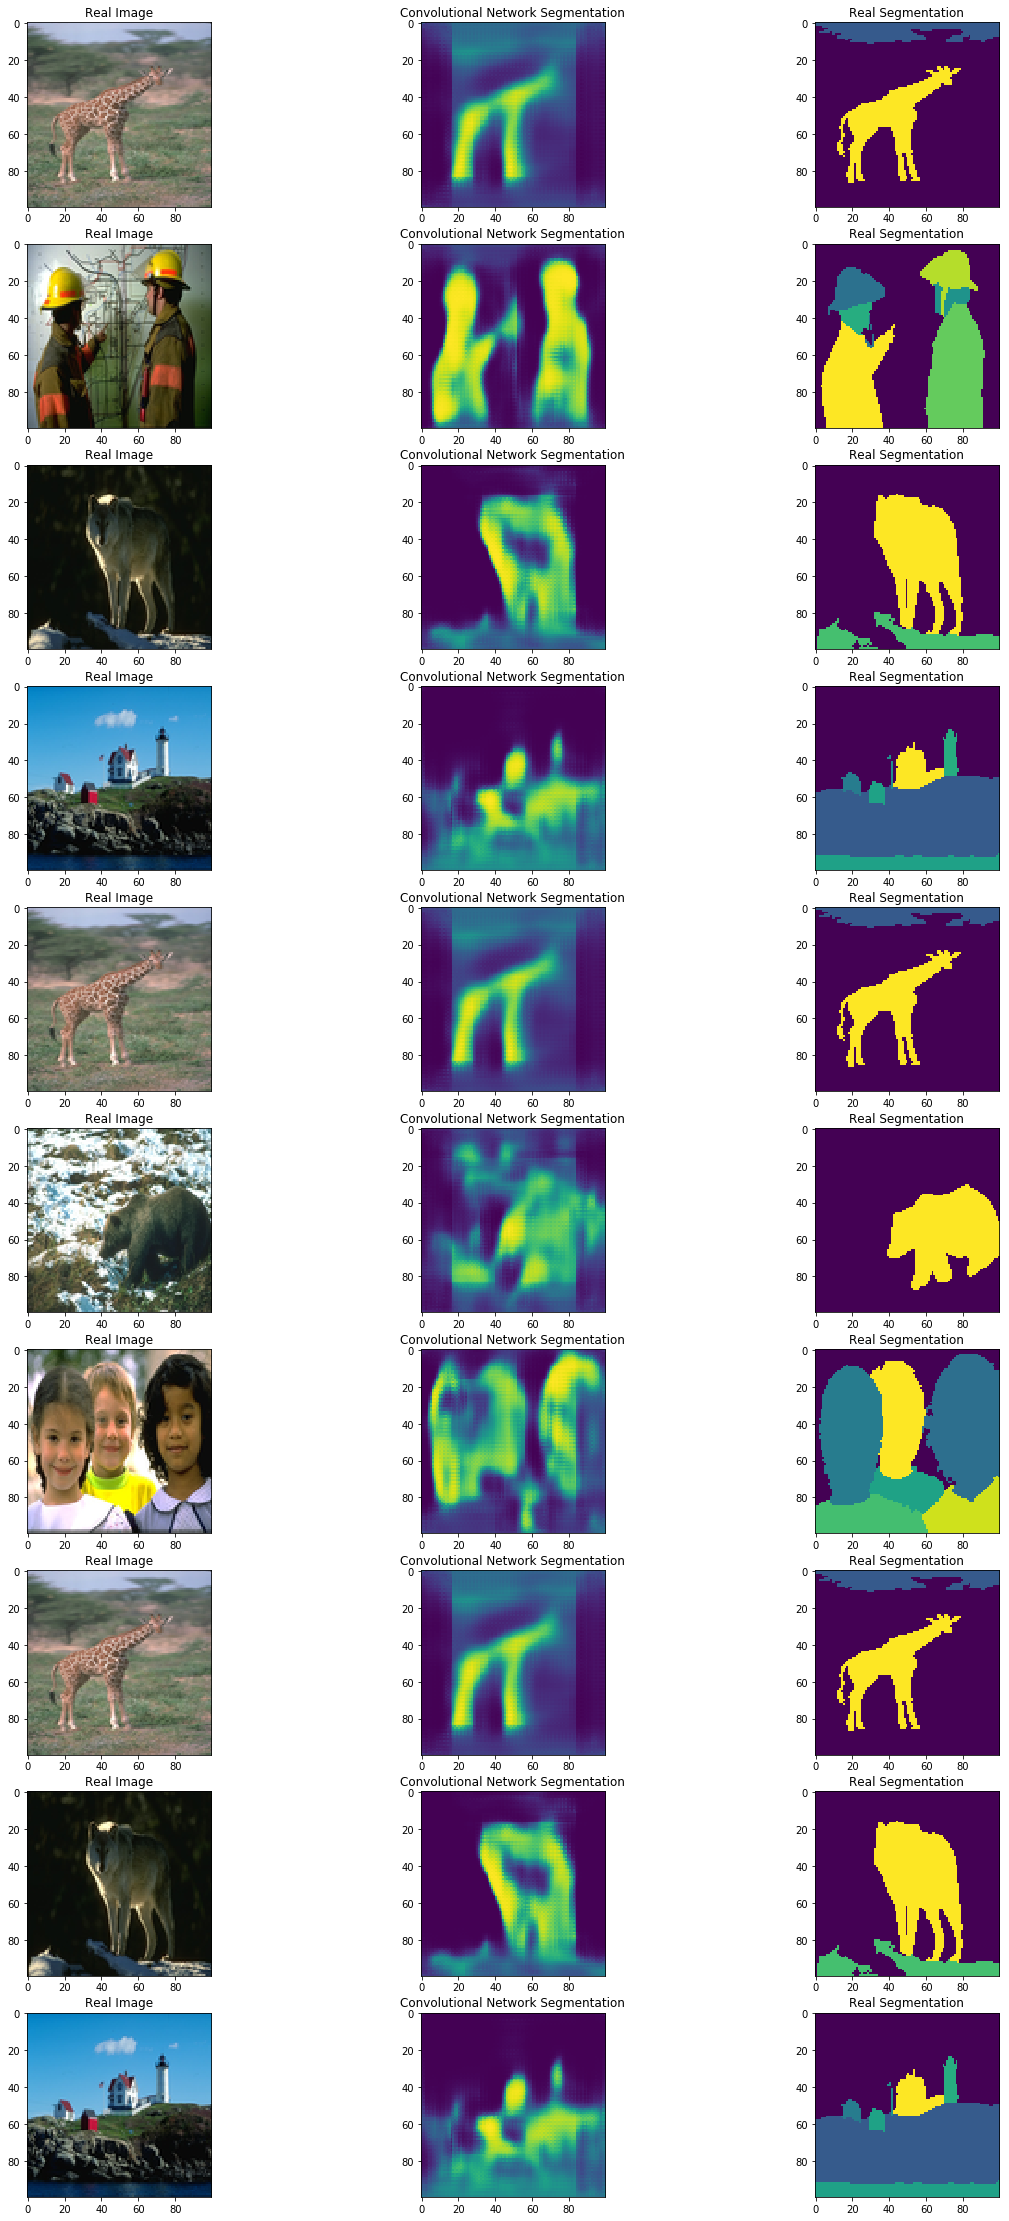

In [33]:
compare_images(conv_model_denoising)

> _**g) Intente variar la arquitectura presentada en pos de obtener un mejor modelo, basado en la evaluación realizada en (d). Recuerde tomar en cuenta la poca cantidad de datos que se tiene.**_

In [58]:
resnet_model = ResNet50(include_top=False,weights='imagenet',input_shape=img_shape)

 1155072/94653016 [..............................] - ETA: 44:31

KeyboardInterrupt: 

In [66]:
input_layer = Input(shape=img_shape)
conv_layer = Conv2D(32,(3,3),activation='relu',padding='same')(input_layer)
pooling_1 = MaxPool2D((2,2))(conv_layer)
conv_layer2 = Conv2D(64,(3,3),activation='relu',padding='same')(pooling_1)
pooling_2 = MaxPool2D((2,2))(conv_layer2)
conv_layer3 = Conv2D(128,(3,3),activation='relu',padding='same')(pooling_2)
up_sampling = UpSampling2D((2,2))(conv_layer3)
conv_trans = Conv2DTranspose(32,(3,3),activation='relu',padding='same')(up_sampling)
conv_trans = Conv2DTranspose(32,(3,3),activation='relu',padding='same')(conv_trans)
merge_layer = merge.Add()([pooling_1,conv_trans])
up_sampling_2 = UpSampling2D((2,2))(merge_layer)
merge_layer_2 = merge.Add()([conv_layer,up_sampling_2])
output = Conv2DTranspose(1,(3,3),activation='sigmoid',padding='same')(merge_layer_2)

In [67]:
conv_propio = Model(input_layer,output)
conv_propio.summary()
conv_propio.compile(loss='binary_crossentropy',optimizer='adam')
conv_propio.fit(x_train,y_train,epochs=100,batch_size=32,validation_data=(x_test,y_test))

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_16 (InputLayer)           (None, 100, 100, 3)  0                                            
__________________________________________________________________________________________________
conv2d_46 (Conv2D)              (None, 100, 100, 32) 896         input_16[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_31 (MaxPooling2D) (None, 50, 50, 32)   0           conv2d_46[0][0]                  
__________________________________________________________________________________________________
conv2d_47 (Conv2D)              (None, 50, 50, 64)   18496       max_pooling2d_31[0][0]           
__________________________________________________________________________________________________
max_poolin

90/90 [==============================] - 1s 15ms/step - loss: 0.4909 - val_loss: 0.5606
Epoch 50/100
90/90 [==============================] - 1s 15ms/step - loss: 0.4855 - val_loss: 0.5387
Epoch 51/100
90/90 [==============================] - 1s 15ms/step - loss: 0.4951 - val_loss: 0.5627
Epoch 52/100
90/90 [==============================] - 1s 15ms/step - loss: 0.4903 - val_loss: 0.5691
Epoch 53/100
90/90 [==============================] - 1s 16ms/step - loss: 0.4857 - val_loss: 0.5780
Epoch 54/100
90/90 [==============================] - 1s 15ms/step - loss: 0.4922 - val_loss: 0.5565
Epoch 55/100
90/90 [==============================] - 1s 15ms/step - loss: 0.4867 - val_loss: 0.5890
Epoch 56/100
90/90 [==============================] - 1s 15ms/step - loss: 0.4888 - val_loss: 0.5565
Epoch 57/100
90/90 [==============================] - 1s 15ms/step - loss: 0.4758 - val_loss: 0.5609
Epoch 58/100
90/90 [==============================] - 1s 15ms/step - loss: 0.4767 - val_loss: 0.5710
Epo

Precision in train dataset: [0.84332623 0.75183038]
Recall in train dataset: [0.89745214 0.65075424]


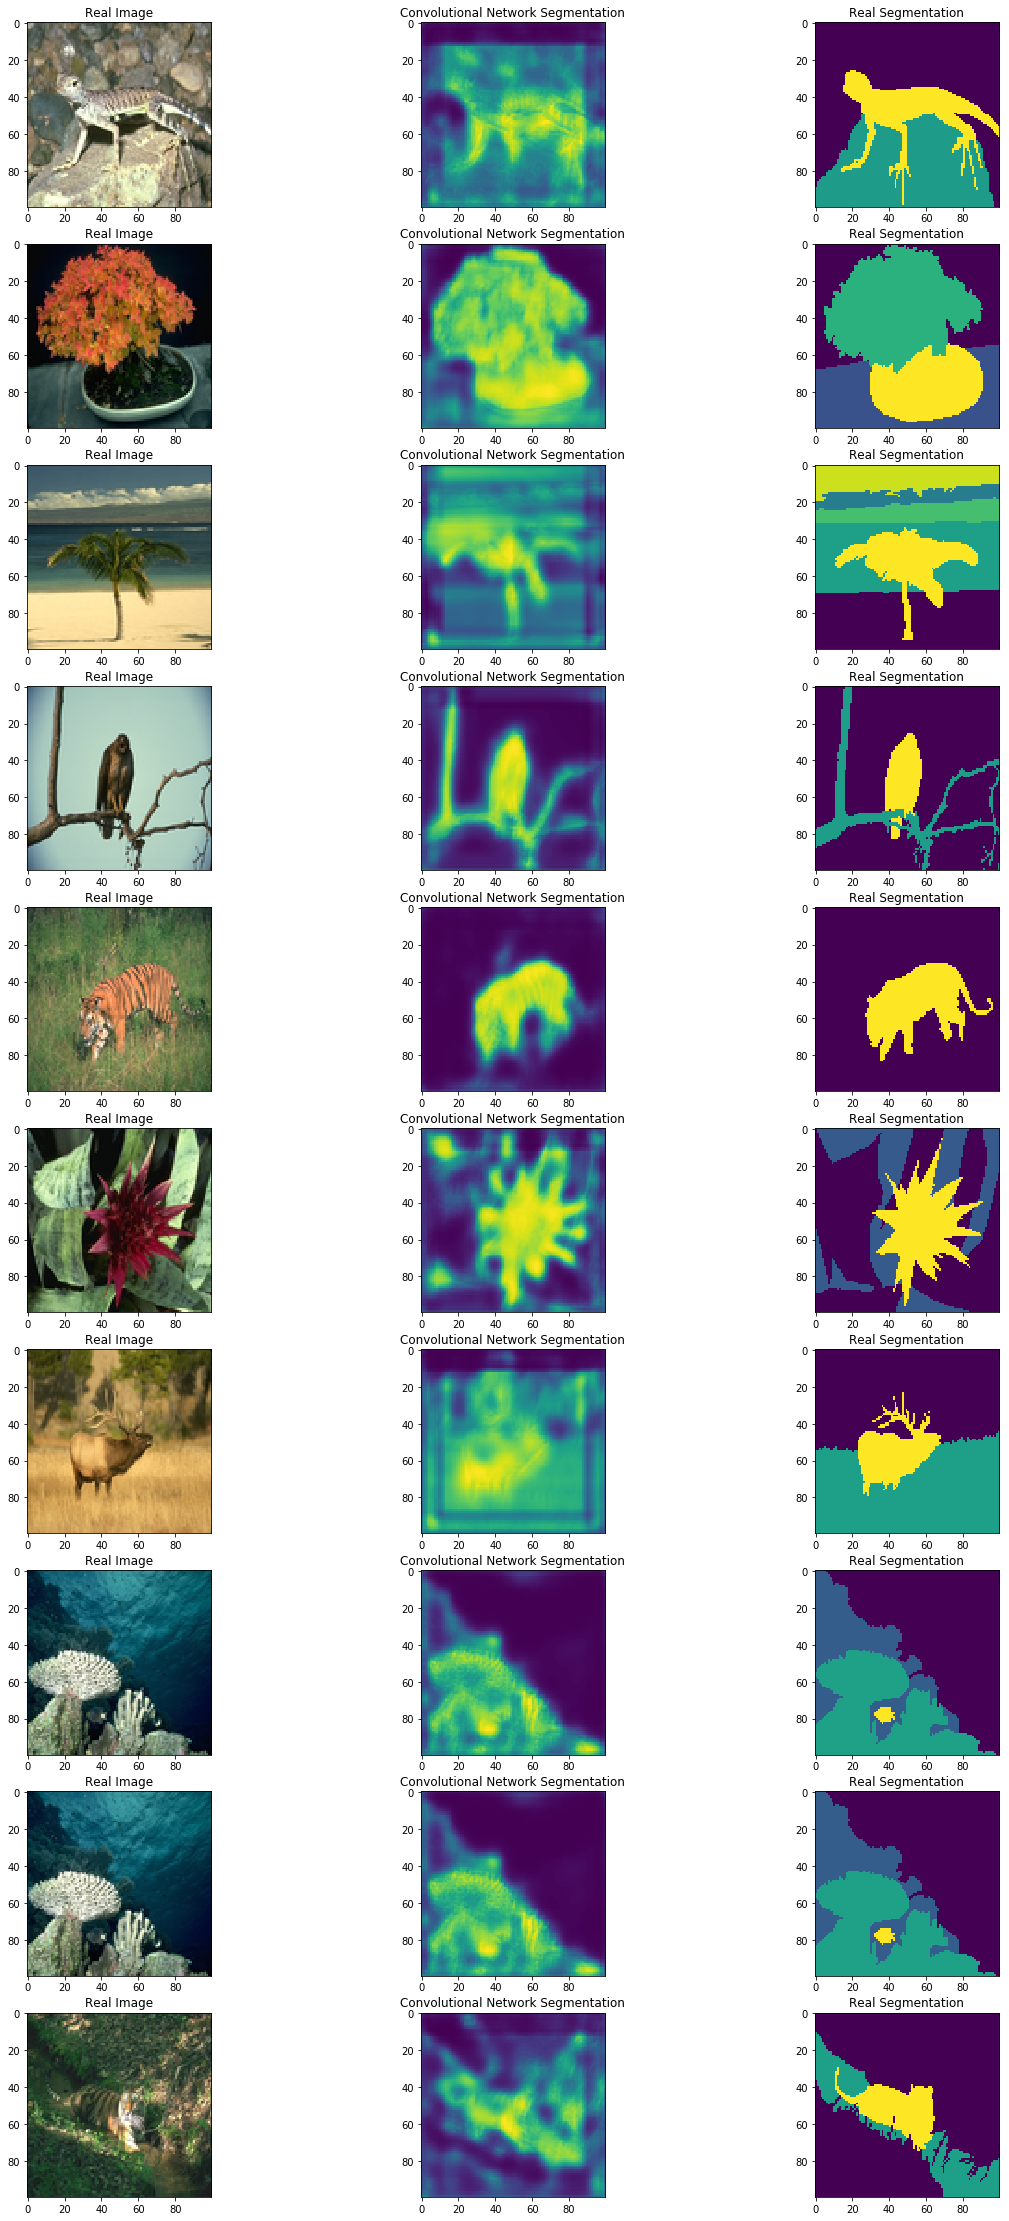

In [68]:
compare_images(conv_propio,dataset='train')

Precision in test dataset: [0.76648181 0.43696549]
Recall in test dataset: [0.69800454 0.52429353]


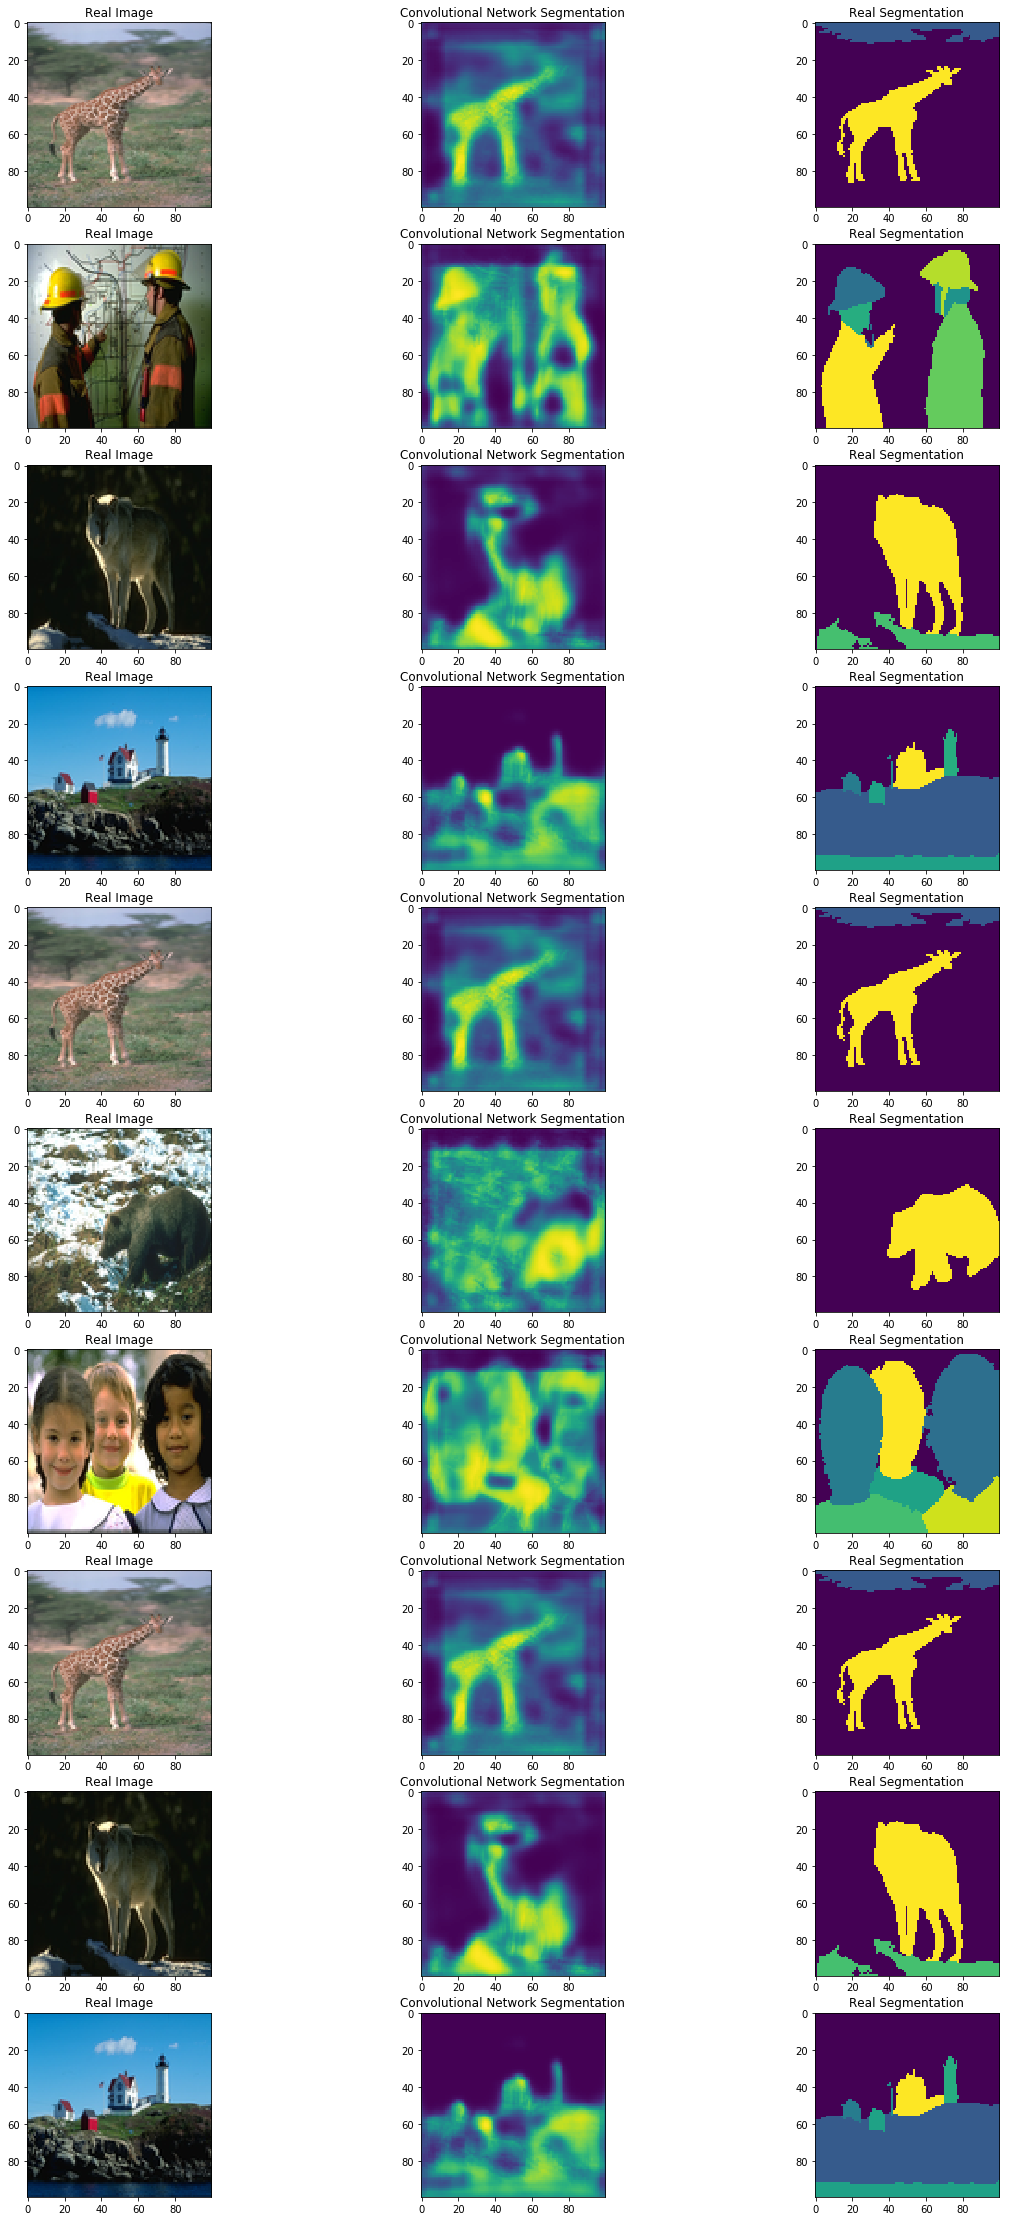

In [69]:
compare_images(conv_propio)